# K-Means Clustering

We have given a collection of 8 points. P1=[0.1,0.6] ,P2=[0.15,0.71], P3=[0.08,0.9] P4=[0.16, 0.85], P5=[0.2,0.3], P6=[0.25,0.5], P7=[0.24,0.1], P8=[0.3,0.2]. Perform the k-mean clustering with initial centroids as m1=P1 = Cluster#1=C1 and m2=P8=cluster#2=C2. Answer the following: <br/>
1] Which cluster does P6 belong to?<br/>
2] What is the population of cluster around m2?  <br/>
3] What is updated value of m1 and m2?<br/>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
class K_Means():
	def __init__(self, k: int = 2):
		self.k = k

	def distance(self, p1, p2):
		x1, y1 = p1
		x2, y2 = p2
		return (x2 - x1) ** 2 + (y2 - y1) ** 2
	
	def fit(self, points, centroids):
		prev_clusters = None
		clusters = [set() for _ in range(self.k)]

		while prev_clusters != clusters:
			prev_clusters = clusters

			for p in points:
				idx = 0

				for i in range(1, self.k):
					if self.distance(p, centroids[i]) < self.distance(p, centroids[idx]):
						idx = i
				
				clusters[idx].add(p)
			
			for i in range(self.k):
				centroids[i] = np.mean(list(clusters[i]), axis=0)
			
		return clusters, centroids

In [35]:
dataset = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)     
]
centroids = [
  (0.1,0.6),
  (0.3,0.2)
]
data = pd.DataFrame(dataset, columns=['X', 'Y'])
data.head()

,X,Y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30


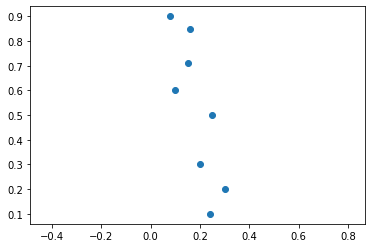

In [36]:
plt.scatter(data['X'], data['Y'])
plt.axis('equal')
plt.show()

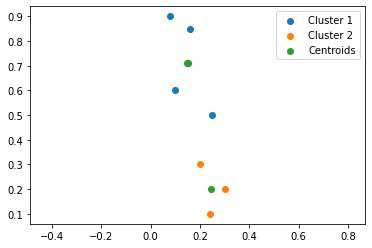

In [37]:
k_means = K_Means()
clusters, centroids = k_means.fit(dataset, centroids)

for i in [0,1]:
	x, y = zip(*clusters[i])
	plt.scatter(x, y, label='Cluster {}'.format(i+1))

x, y = zip(*centroids)
plt.scatter(x, y, label='Centroids')

plt.legend()
plt.axis("equal")
plt.show()

In [40]:
p6 = (0.25, 0.5)
p6c = 1 if p6 in clusters[0] else 2

print("\n1. P6", p6, "belongs to cluster:", p6c)
print("2. Population around cluster m2:", len(clusters[1]))
print("3. Updated values of centroids:", centroids)


1. P6 (0.25, 0.5) belongs to cluster: 1
2. Population around cluster m2: 3
3. Updated values of centroids: [array([0.148, 0.712]), array([0.24666667, 0.2       ])]
